In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


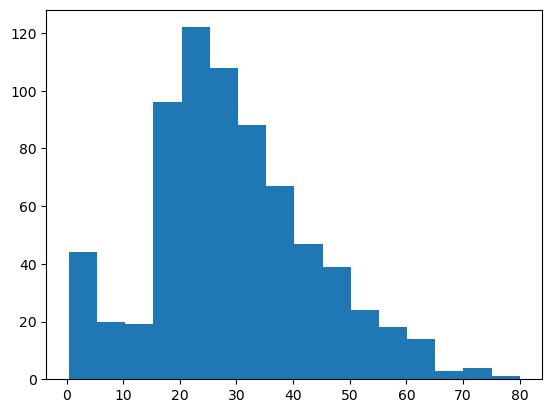

In [5]:
plt.hist(train.Age, bins=16)

plt.show()

In [6]:
train['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [7]:
copy_train = train
copy_train.dropna(subset=['Age'], inplace=True)
copy_train['Age'] = copy_train['Age'].astype('i')

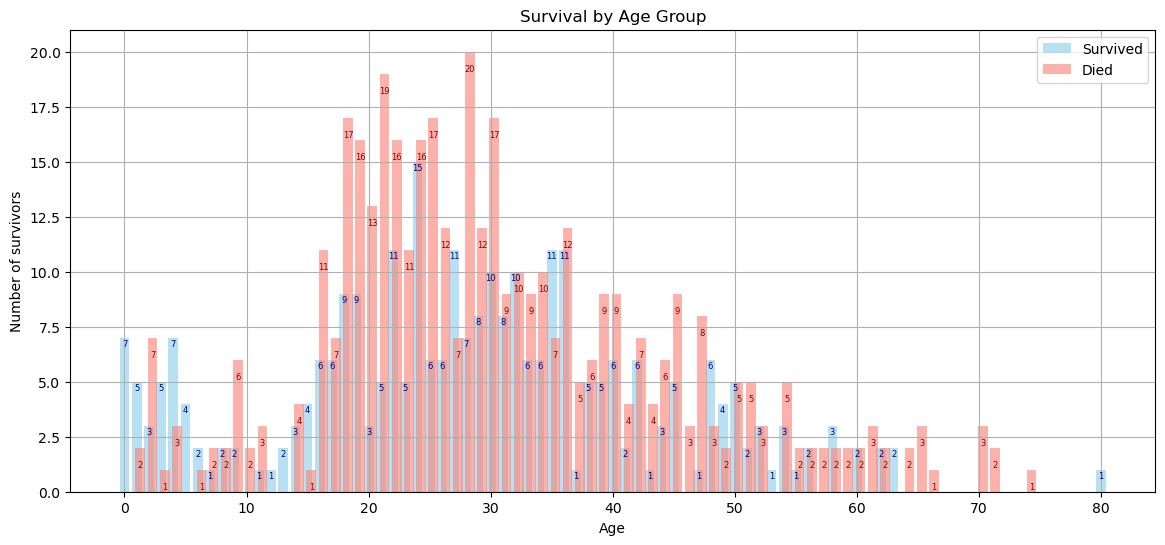

In [18]:
survived_counts = copy_train[copy_train['Survived'] == 1]['Age'].value_counts().sort_index()
died_counts = copy_train[copy_train['Survived'] == 0]['Age'].value_counts().sort_index()

# Plotting the grouped bar chart
plt.figure(figsize=(14, 6))

for age, count in zip(survived_counts.index, survived_counts.values):
    plt.text(age, count - 0.5, str(count), ha='center', va='bottom', fontsize=6, color='darkblue')

for age, count in zip(died_counts.index, died_counts.values):
    plt.text(age + 0.3, count - 1, str(count), ha='center', va='bottom', fontsize=6, color='darkred')

plt.bar(survived_counts.index, survived_counts.values, color='skyblue', label='Survived', alpha=0.6)
plt.bar(died_counts.index + 0.3, died_counts.values, color='salmon', label='Died', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Number of survivors')
plt.title('Survival by Age Group')
plt.legend()
plt.grid(True)

In [22]:
class_survival_rate = copy_train.groupby('Pclass')['Survived'].mean()

class_survival_rate

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64